In [3]:
#| hide
%load_ext autoreload
%autoreload 2

from utils.config import JunoConfig, j_config, w_config
from utils import keep_good_fit
from rich import print
import polars as pl
import hvplot.polars

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
j_config.path
w_config.path

Path('../data/05_reporting/events.Wind.fit.ts_0.09s_tau_60s.arrow')

In [6]:
JunoConfig(method='derivative', ts=0.125).path

Path('../data/05_reporting/events.JNO.derivative.ts_0.12s_tau_60s.arrow')

In [2]:
j_events = j_config.events.with_row_index().with_columns(r_bin=pl.col("radial_distance").round()).pipe(keep_good_fit)
w_events = w_config.events.with_row_index().pipe(keep_good_fit)

In [3]:
def plot(events, x, y, by = None, **kwargs):
    return events.hvplot.scatter(
        x=x,
        y=y,
        by=by,
        subplots=True,
        shared_axes=False,
        logx=True,
        logy=True,
        hover_cols=["v_k", "duration", "fit.vars.sigma", "index"],
        **kwargs
    )

plot(j_events, "L_k", "ion_inertial_length", by="r_bin").cols(2)

:NdLayout   [r_bin]
   :Scatter   [L_k]   (ion_inertial_length,v_k,duration,fit.vars.sigma,index)

In [4]:
plot(w_events, "L_k", "ion_inertial_length")


:Scatter   [L_k]   (ion_inertial_length,v_k,duration,fit.vars.sigma,index)

In [35]:
p1 = j_events.hvplot.density(y="L_k_norm", by="r_bin", subplots=True, xlim=(-1, 40))
p2 = j_events.hvplot.density(y="L_k", by="r_bin", subplots=True, xlim=(-1, 15000))
# (p1 + p2).cols(2)

In [6]:
w_events.hvplot.density(y="L_k_norm")

:Distribution   [L_k_norm]   (Density)

In [19]:
plot("j0_k", "j_Alfven").cols(2)

25-Feb-24 19:38:28: Logarithmic axis range encountered value less than or equal to zero, please supply explicit lower bound to override default of 0.010.
25-Feb-24 19:38:28: Logarithmic axis range encountered value less than or equal to zero, please supply explicit lower bound to override default of 0.010.
25-Feb-24 19:38:28: Logarithmic axis range encountered value less than or equal to zero, please supply explicit lower bound to override default of 0.010.
25-Feb-24 19:38:28: Logarithmic axis range encountered value less than or equal to zero, please supply explicit lower bound to override default of 0.010.
25-Feb-24 19:38:28: Logarithmic axis range encountered value less than or equal to zero, please supply explicit lower bound to override default of 0.010.


:NdLayout   [r_bin]
   :Scatter   [j0_k]   (j_Alfven,v_k,duration,fit.vars.sigma,index)

(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': '#Plasma parameters# $V_i: 403.16 \\mathrm{km/s}$, $n_i: 0.36 \\mathrm{cm}^{-3}$, $T_i: 28689.00 \\mathrm{eV}$\n#Fit# $\\max dB/dt$: 1.43, $R^2$: 0.97, $\\chi^2$: 0.01\n#Fit# $c$: -0.30, $Amp$: 0.30, $\\Sigma$: 0.05'}, ylabel='$B$\n[nT LMN]'>)

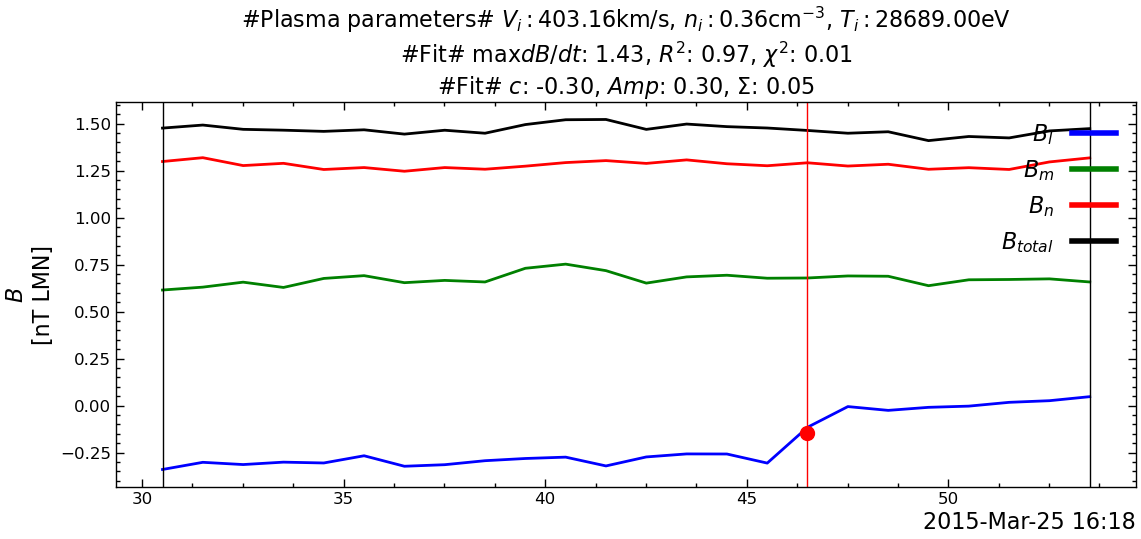

In [13]:
config.plot_candidate(index=78063, add_plasma_params=True, plot_fit_data=True)